In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

pd.set_option('display.max_rows', 160)
pd.set_option('display.max_columns', 160)

In [5]:
train = pd.read_csv("./AV - HR/train_LZdllcl.csv")
test = pd.read_csv("./AV - HR//test_2umaH9m.csv")

train_id = train.employee_id
test_id = test.employee_id

print("Train set: ", train.shape)
print("Test set: ", test.shape)

train.sample(10)

Train set:  (54808, 14)
Test set:  (23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31941,75638,Sales & Marketing,region_11,Master's & above,m,sourcing,2,35,3.0,3,0,0,48,0
4076,21671,Sales & Marketing,region_2,Bachelor's,m,referred,1,27,2.0,3,1,0,48,0
26789,62992,Operations,region_19,Bachelor's,f,other,1,35,2.0,9,1,0,59,0
11871,47204,HR,region_2,Bachelor's,f,other,1,33,4.0,7,1,0,49,0
46525,42686,Sales & Marketing,region_27,NaN,m,sourcing,1,34,2.0,7,0,0,52,0
4354,11623,Sales & Marketing,region_27,Master's & above,m,sourcing,1,38,1.0,7,1,1,49,0
45839,24542,Procurement,region_27,Bachelor's,f,other,1,34,3.0,5,0,0,62,0
6999,55352,Technology,region_19,Bachelor's,m,other,4,37,4.0,7,0,0,84,0
7717,53413,Operations,region_8,Master's & above,f,other,1,37,4.0,10,0,0,56,0
30156,58331,Procurement,region_23,Master's & above,m,other,1,33,3.0,5,0,0,65,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
train[train.duplicated()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [9]:
cat_cols = ["department", "region", "gender", "recruitment_channel", "no_of_trainings", "KPIs_met >80%", "awards_won?"]

num_cols = ["age", "length_of_service", "avg_training_score"]

ord_cols = ["education", "previous_year_rating"]

In [10]:
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

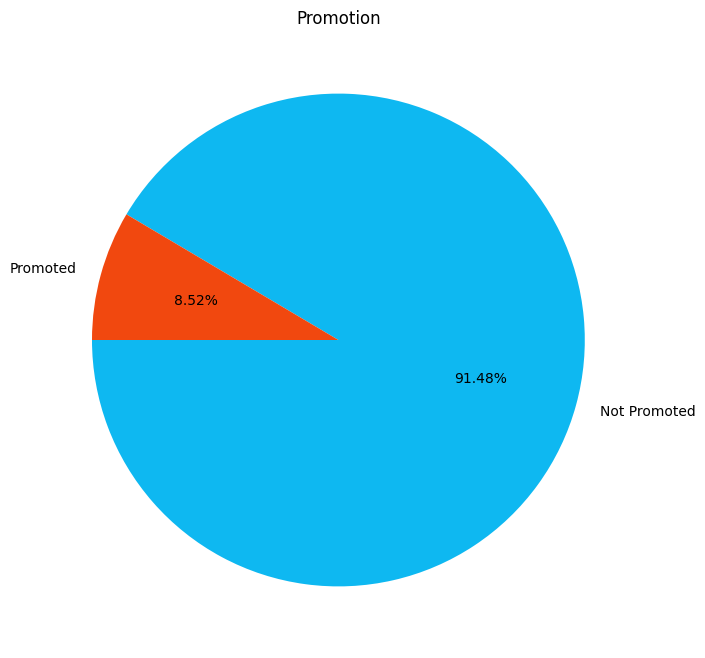

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.pie(train.is_promoted.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()

In [12]:
df = pd.concat([train, test])
df_raw = df.copy()

In [13]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [14]:
df.loc[df.previous_year_rating.isnull() & (df.length_of_service == 1), "previous_year_rating"] = 0

In [15]:
df.education.value_counts(normalize = True)

education
Bachelor's          0.697976
Master's & above    0.286273
Below Secondary     0.015750
Name: proportion, dtype: float64

In [16]:
freq_df = df.groupby(["department", "gender", "recruitment_channel"])["education"].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)

pct_df["new_val"] = ""
for i in range(pct_df.shape[0]):
    if (pct_df.values[i][2] >= 0.30) & (pct_df.values[i][0] < 0.69):
        pct_df["new_val"][i] = "Master's & above"
    elif (pct_df.values[i][0] >= 0.70) & (pct_df.values[i][2] <= 0.28):
        pct_df["new_val"][i] = "Bachelor's"
    elif (pct_df.values[i][0] >= 0.70):
        pct_df["new_val"][i] = "Bachelor's"
    else:
         pct_df["new_val"][i] = "Below Secondary"

pct_df

C:\Users\abhishek189609\AppData\Local\Temp\ipykernel_126040\180605127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pct_df["new_val"][i] = "Bachelor's"
C:\Users\abhishek189609\AppData\Local\Temp\ipykernel_126040\180605127.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pct_df["new_val"][i] = "Bachelor's"
C:\Users\abhishek189609\AppData\Local\Temp\ipykernel_126040\180605127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

education                                     Bachelor's  Below Secondary  \
department        gender recruitment_channel                                
Analytics         f      other                  0.892421              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.922535              NaN   
                  m      other                  0.770424              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.782703              NaN   
Finance           f      other                  0.759777         0.044693   
                         sourcing               0.750000         0.060000   
                  m      other                  0.744569         0.038841   
                         referred               1.000000              NaN   
                         sourcing               0.751123         0.043127   
HR                f      other                  0.632704         0.045283   
                         referred               0.641026         0.128205   
                         sourcing               0.622378         0.052448   
                  m      other                  0.642478         0.053097   
                         referred               0.753086         0.111111   
                         sourcing               0.641698         0.051186   
Legal             f      other                  0.794643         0.098214   
                         sourcing               0.785714         0.035714   
                  m      other                  0.768480         0.068340   
                         referred               1.000000              NaN   
                         sourcing               0.774254         0.069030   
Operations        f      other                  0.682071         0.012249   
                         referred               0.682243              NaN   
                         sourcing               0.708569         0.013456   
                  m      other                  0.706714         0.018453   
                         referred               0.644144              NaN   
                         sourcing               0.710999         0.018458   
Procurement       f      other                  0.609080         0.018469   
                         referred               0.589744              NaN   
                         sourcing               0.609858         0.021500   
                  m      other                  0.631920         0.018776   
                         referred               0.677419              NaN   
                         sourcing               0.612724         0.023057   
R&D               f      other                  0.615385              NaN   
                         sourcing               0.533333              NaN   
                  m      other                  0.537293              NaN   
                         referred               0.592593              NaN   
                         sourcing               0.558304              NaN   
Sales & Marketing f      other                  0.702331              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.717309              NaN   
                  m      other                  0.724401              NaN   
                         referred               0.893082              NaN   
                         sourcing               0.730578              NaN   
Technology        f      other                  0.657737         0.027252   
                         referred               0.740000         0.066667   
                         sourcing               0.652638         0.023241   
                  m      other                  0.648722         0.024662   
                         referred               0.810811         0.069069

In [17]:
for i in range(pct_df.shape[0]):

    df.loc[(df.education.isnull()) & (df.department == pct_df.index[i][0]) & (df.gender == pct_df.index[i][1]) & \
           (df.recruitment_channel == pct_df.index[i][2]), "education"] = pct_df.new_val.values[i]

In [18]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [19]:
def count_percentage(df, col, hue):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
    order = sorted(df[col].unique())
    palette = ["#0EB8F1", "#F1480F"]
    
    sns.countplot(col, data = df, hue = hue, ax = ax1, order = order, palette = palette)
    ax1.set_title("Counts For Feature:\n" + col)

    df_temp = df.groupby(col)[hue].value_counts(normalize = True).\
    rename("percentage").\
    reset_index()
    
    fig = sns.barplot(x = col, y = "percentage", hue = hue, data = df_temp, ax = ax2, order = order, palette = palette)
    fig.set_ylim(0,1)
    
    fontsize = 14 if len(order) <= 10 else 8
    for p in fig.patches:
        
        txt = "{:.1f}".format(p.get_height() * 100) + "%"
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.text(txt_x + 0.125, txt_y + 0.02,txt, fontsize = fontsize)

    ax2.set_title("Percentages For Feature: \n" + col)
    plt.setp(ax1.get_xticklabels(), rotation=70, horizontalalignment='right')
    plt.setp(ax2.get_xticklabels(), rotation=70, horizontalalignment='right')
    
    for ax in [ax1, ax2]:
        ax.set_facecolor("#C7D3D4FF")
        ax.grid(linewidth = 0.25)

TypeError: countplot() got multiple values for argument 'data'

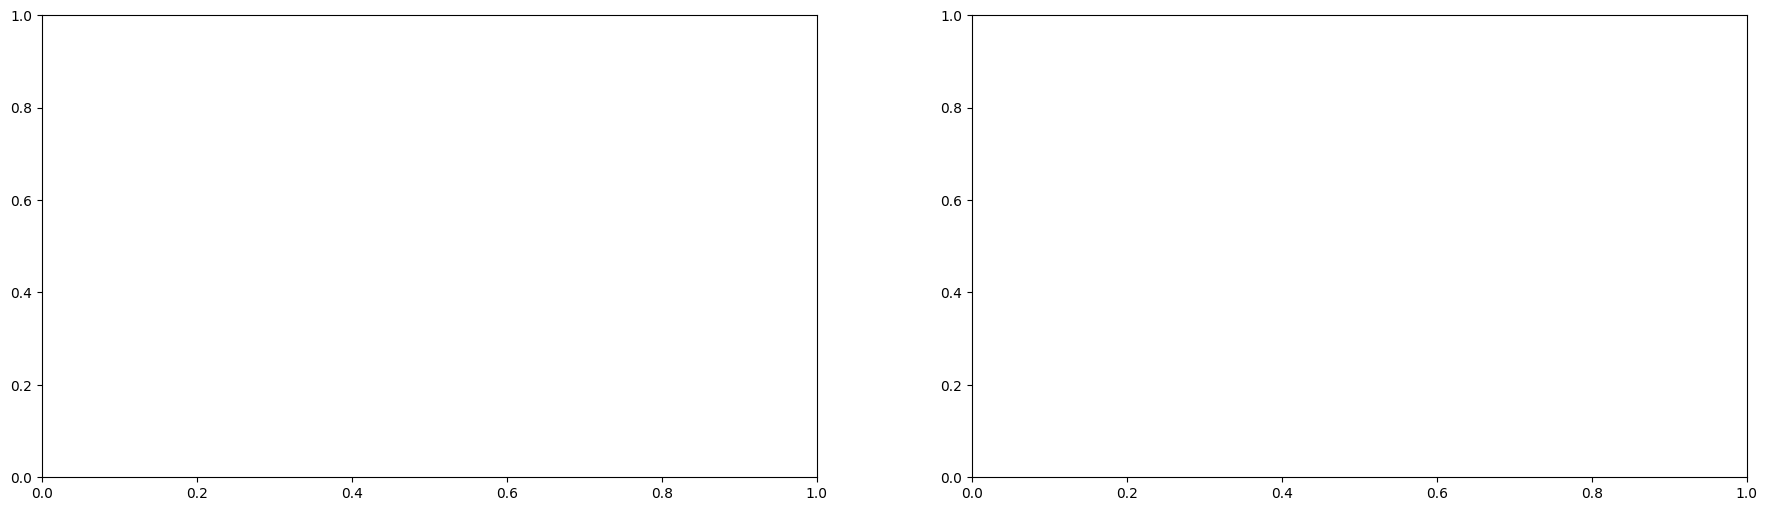

In [20]:
for col in cat_cols + ord_cols:
    count_percentage(df, col, "is_promoted")

In [21]:
def feature_dist_clas(df, col, hue):
    
    fig, axes = plt.subplots(1, 4, figsize = (25, 5))
    order = sorted(df[hue].unique())
    palette = ["#0EB8F1", "#F1480F"]
    
    sns.histplot(x = col, hue = hue, data = df, ax = axes[0], palette = palette, edgecolor="black", linewidth=0.5)
    sns.kdeplot(x = col, hue = hue, data = df, fill = True, ax = axes[1], palette = palette, linewidth = 2)
    sns.boxplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[2], 
                palette = palette, linewidth = 2, flierprops = dict(marker = "x", markersize = 3.5))
    
    sns.violinplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[3], palette = palette)
    
    fig.suptitle("For Feature:  " + col)
    axes[0].set_title("Histogram For Feature " + col)
    axes[1].set_title("KDE Plot For Feature " + col)   
    axes[2].set_title("Boxplot For Feature " + col)   
    axes[3].set_title("Violinplot For Feature " + col)   
    
    for ax in axes:
        ax.set_facecolor("#C7D3D4FF")
        ax.grid(linewidth = 0.25)

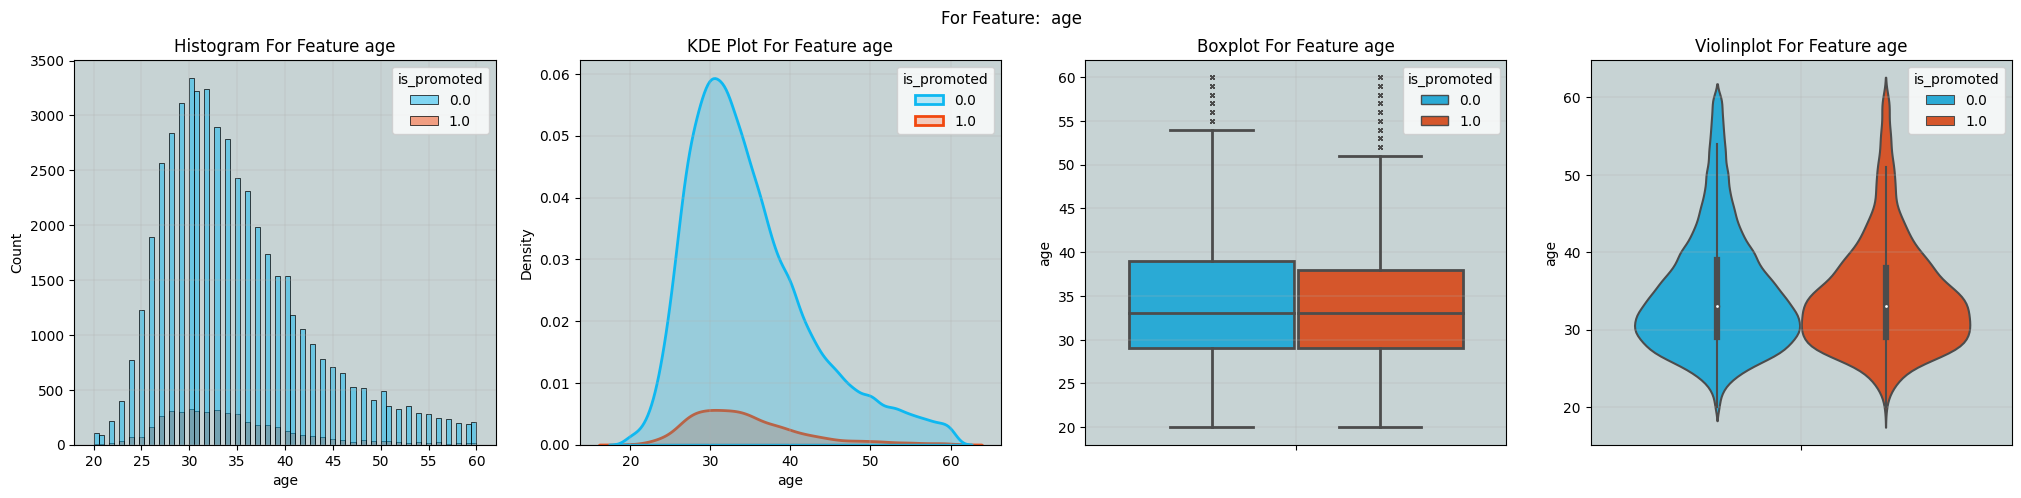

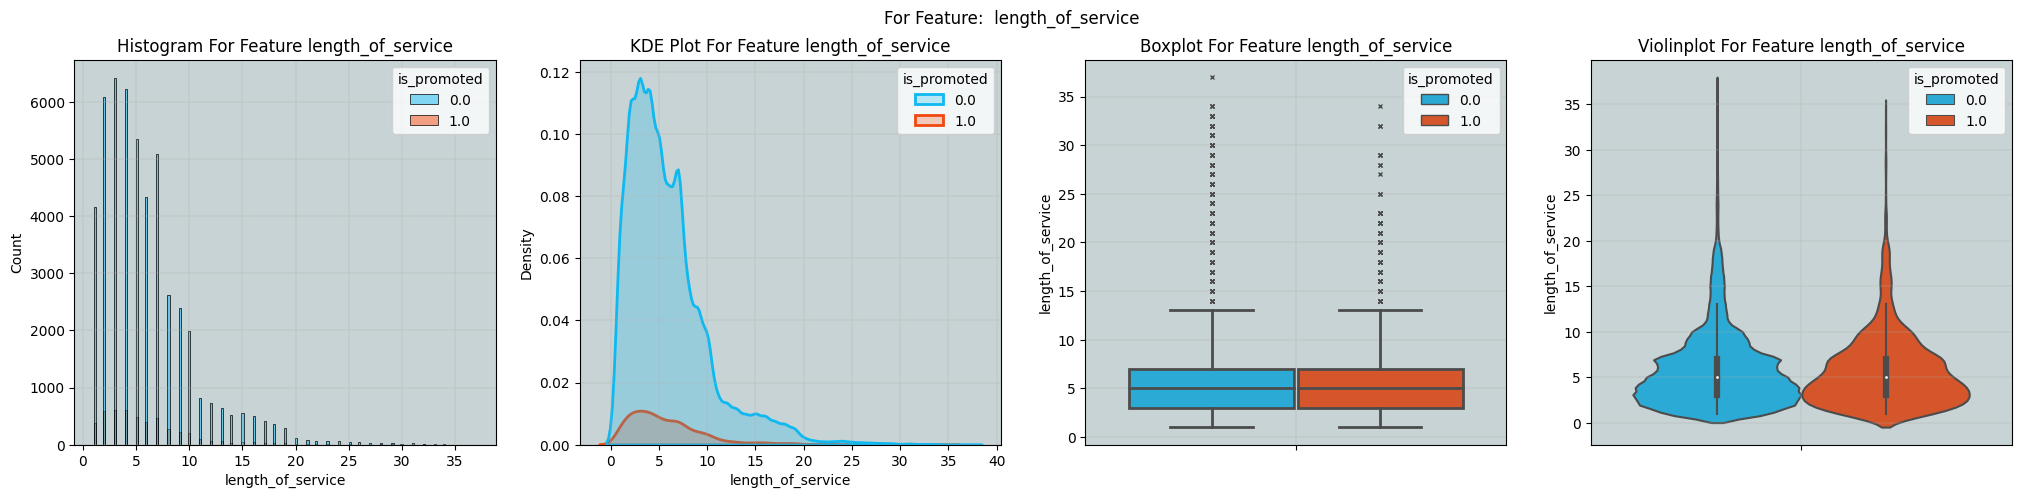

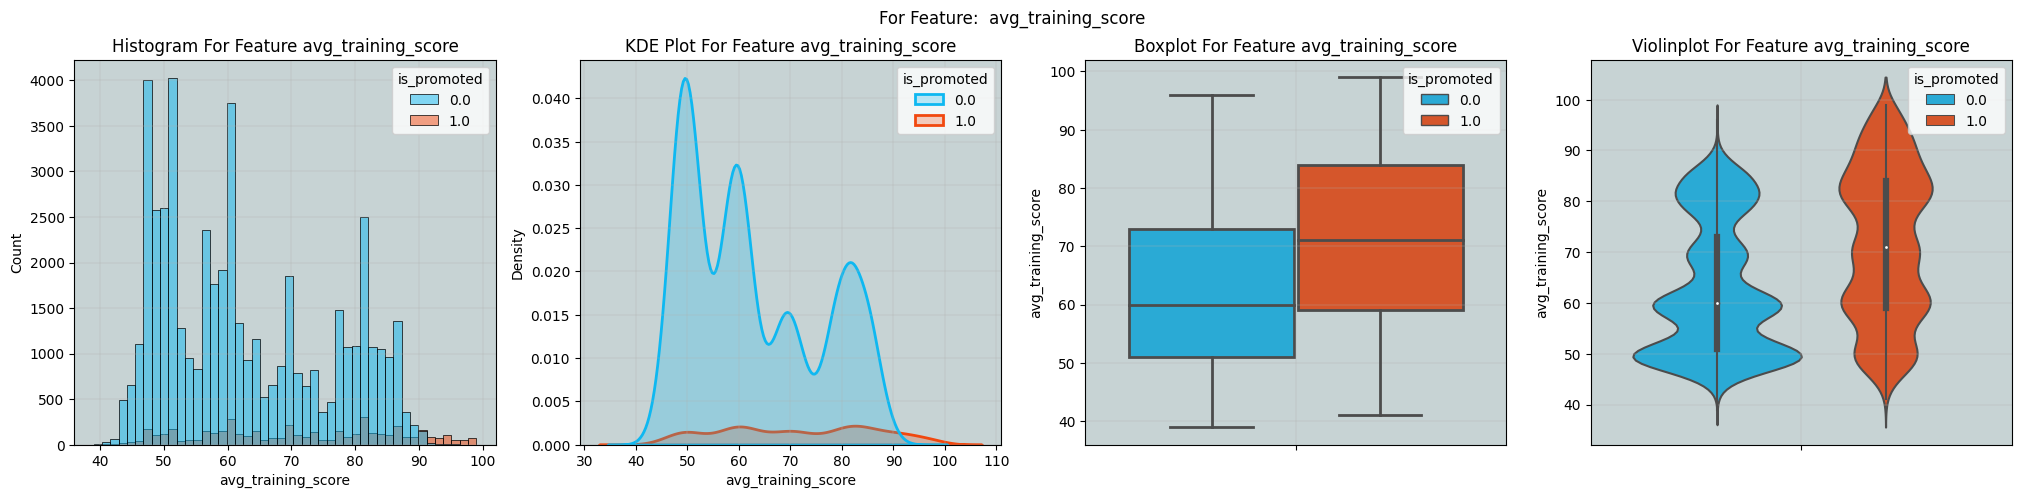

In [22]:
for col in num_cols:
    feature_dist_clas(df, col, "is_promoted")

In [23]:
df2 = df.copy()

In [24]:
df2["is_firstyear"] = df2["length_of_service"].apply(lambda x: 1 if x==1 else 0)
df2["starting_age"] = df2["age"] - df2["length_of_service"]
df2["total_success"] = df2["avg_training_score"] + df2["KPIs_met >80%"]*100 + df2["awards_won?"]* 100 + df2["previous_year_rating"]*20

In [25]:
rd1 = df2.groupby(["region", "department"])["employee_id"].count()
rd2 = df2.groupby(["region", "department"])["age"].mean()
rd3 = df2.groupby(["region", "department"])["avg_training_score"].mean()
rd4 = df2.groupby(["region", "department"])["total_success"].mean()
rd5 = df2.groupby(["region", "department"])["previous_year_rating"].mean()
rd6 = df2.groupby(["region", "department"])["length_of_service"].mean()
rd7 = df2.groupby(["region", "department"])["is_firstyear"].sum()


for i in range(rd1.shape[0]):
    region = rd1.index[i][0]
    department = rd1.index[i][1]

    df2.loc[(df2.region == region) & (df2.department == department), "employee_per_department&region"] = rd1[i]
    df2.loc[(df2.region == region) & (df2.department == department), "avg_age_for_department&region"] = rd2[i]
    df2.loc[(df2.region == region) & (df2.department == department), "avg_score_for_department&region"] = rd3[i]
    df2.loc[(df2.region == region) & (df2.department == department), "avg_succes_department&region"] = rd4[i]
    df2.loc[(df2.region == region) & (df2.department == department), "avg_prev_year_rating_department&region"] = rd5[i]
    df2.loc[(df2.region == region) & (df2.department == department), "avg_len_of_service_department&region"] = rd6[i]
    df2.loc[(df2.region == region) & (df2.department == department), "total_rookie_for_department&region"] = rd7[i]    

In [26]:
df2["is_young_in_dep_reg"] = np.where((df2.age <= df2["avg_age_for_department&region"]), 0, 1)
df2["better_score_in_dep_reg"] = np.where((df2["avg_score_for_department&region"] <= df2["avg_training_score"]), 1, 0)
df2["better_success_in_dep_reg"] = np.where((df2["avg_succes_department&region"] <= df2["total_success"]), 1, 0)
df2["better_prev_year_rating_in_dep_reg"] = np.where((df2["avg_prev_year_rating_department&region"] <= df2["previous_year_rating"]), 1, 0)
df2["longer_len_of_service_rating_in_dep_reg"] = np.where((df2["avg_len_of_service_department&region"] <= df2["length_of_service"]), 1, 0)

In [27]:
d1 = df2.groupby("department")["employee_id"].count()
d2 = df2.groupby("department")["age"].mean()
d3 = df2.groupby("department")["avg_training_score"].mean()
d4 = df2.groupby("department")["total_success"].mean()
d5 = df2.groupby("department")["previous_year_rating"].mean()
d6 = df2.groupby("department")["length_of_service"].mean()
d7 = df2.groupby("department")["is_firstyear"].sum()


for i in range(d1.shape[0]):
    department = d1.index[i]

    df2.loc[(df2.department == department), "employee_per_department"] = d1[i]
    df2.loc[(df2.department == department), "avg_age_for_department"] = d2[i]
    df2.loc[(df2.department == department), "avg_score_for_department"] = d3[i]
    df2.loc[(df2.department == department), "avg_succes_department"] = d4[i]
    df2.loc[(df2.department == department), "avg_prev_year_rating_department"] = d5[i]
    df2.loc[(df2.department == department), "avg_len_of_service_department"] = d6[i]
    df2.loc[(df2.department == department), "total_rookie_for_department"] = d7[i]  

In [28]:
df2["is_young_in_dep"] = np.where((df2.age <= df2["avg_age_for_department"]), 0, 1)
df2["better_score_in_dep"] = np.where((df2["avg_score_for_department"] <= df2["avg_training_score"]), 1, 0)
df2["better_success_in_dep"] = np.where((df2["avg_succes_department"] <= df2["total_success"]), 1, 0)
df2["better_prev_year_rating_in_dep"] = np.where((df2["avg_prev_year_rating_department"] <= df2["previous_year_rating"]), 1, 0)
df2["longer_len_of_service_rating_in_dep"] = np.where((df2["avg_len_of_service_department"] <= df2["length_of_service"]), 1, 0)

In [29]:
df2["education"] = df2["education"].map({"Below Secondary": 1, "Bachelor's": 2, "Master's & above":3})

In [30]:
df2["total_training_score"] = df2["no_of_trainings"] * df2["avg_training_score"]

In [31]:
#https://maxhalford.github.io/blog/target-encoding/
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

df2["region"] = calc_smooth_mean(df2, "region", "is_promoted", 300)
df2["department"] = calc_smooth_mean(df2, "department", "is_promoted", 300)

In [34]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import lightgbm as lgb

from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [35]:
dummies = pd.get_dummies(df2[["gender", "recruitment_channel"]], drop_first = True)

fin = pd.concat([df2, dummies], axis = 1).drop(["gender", "recruitment_channel"], axis = 1)
fin

,employee_id,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_firstyear,starting_age,total_success,employee_per_department&region,avg_age_for_department&region,avg_score_for_department&region,avg_succes_department&region,avg_prev_year_rating_department&region,avg_len_of_service_department&region,total_rookie_for_department&region,is_young_in_dep_reg,better_score_in_dep_reg,better_success_in_dep_reg,better_prev_year_rating_in_dep_reg,longer_len_of_service_rating_in_dep_reg,employee_per_department,avg_age_for_department,avg_score_for_department,avg_succes_department,avg_prev_year_rating_department,avg_len_of_service_department,total_rookie_for_department,is_young_in_dep,better_score_in_dep,better_success_in_dep,better_prev_year_rating_in_dep,longer_len_of_service_rating_in_dep,total_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.072261,0.105299,3,1,35,5.0,8,1,0,49,0.0,0,27,249.0,2068.0,35.951161,50.331721,141.705029,2.968085,6.437137,140.0,0,0,1,1,1,24155.0,34.801615,50.208487,135.807328,2.830967,5.871911,2096.0,1,0,1,1,1,49,False,False,True
1,65141,0.090020,0.112894,2,1,30,5.0,4,0,0,60,0.0,0,26,160.0,2184.0,35.996795,60.538919,179.980311,3.437729,6.490842,163.0,0,0,0,1,0,16112.0,36.084471,60.248572,175.058652,3.451837,6.415653,914.0,0,0,0,1,0,60,True,False,False
2,7513,0.072261,0.066909,2,1,34,3.0,7,0,0,50,0.0,0,27,110.0,405.0,35.330864,49.985185,122.429630,2.708642,6.197531,19.0,0,1,0,1,1,24155.0,34.801615,50.208487,135.807328,2.830967,5.871911,2096.0,0,0,0,1,1,50,True,False,True
3,2542,0.072261,0.110204,2,2,39,1.0,10,0,0,50,0.0,0,29,70.0,539.0,34.994434,50.211503,142.270872,3.146568,6.165121,22.0,1,0,0,0,1,24155.0,34.801615,50.208487,135.807328,2.830967,5.871911,2096.0,1,0,0,0,1,100,True,False,False
4,48945,0.106689,0.065840,2,1,45,3.0,2,0,0,73,0.0,0,43,133.0,561.0,34.600713,80.028520,169.868093,2.834225,5.784314,60.0,1,0,0,1,0,10149.0,34.887378,79.908464,175.346438,2.910632,5.895458,881.0,1,0,0,1,0,73,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0.058664,0.080246,1,1,24,3.0,1,0,0,61,NaN,1,23,121.0,515.0,37.759223,59.578641,148.937864,2.992233,6.064078,64.0,0,1,0,1,0,1484.0,33.818733,59.780323,153.459569,2.894879,4.600404,256.0,0,1,0,1,0,61,True,False,True
23486,25600,0.106689,0.114880,2,1,31,3.0,7,0,0,74,NaN,0,24,134.0,122.0,31.016393,79.418033,177.450820,3.057377,4.500000,12.0,0,0,0,0,1,10149.0,34.887378,79.908464,175.346438,2.910632,5.895458,881.0,0,0,0,1,1,74,True,False,True
23487,45409,0.059437,0.072267,2,1,26,4.0,4,0,0,50,NaN,0,22,130.0,53.0,29.037736,49.415094,142.622642,2.962264,3.622642,13.0,0,1,0,1,1,3503.0,34.356266,50.107337,148.891236,3.149301,5.666001,377.0,0,0,0,1,0,50,False,False,True
23488,1186,0.095933,0.060649,2,3,27,0.0,1,0,0,70,NaN,1,26,70.0,280.0,33.385714,69.867857,169.439286,2.978571,5.217857,23.0,0,1,0,0,0,10158.0,35.968596,70.129455,172.135755,3.091553,6.303603,666.0,0,0,0,0,0,210,True,False,True


In [36]:
train = fin[fin.is_promoted.notnull()]
test = fin[fin.is_promoted.isnull()]

target = "is_promoted"
predictors = [x for x in train.columns if x not in ["employee_id", "is_promoted"]]

In [37]:
f1_scorer = make_scorer(f1_score)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], 
                                                    test_size = 0.2, 
                                                    stratify = train[target], 
                                                    random_state = 42)

In [38]:
def lgb_f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    return ('F1', f1_score(y_true, y_pred), True)

In [39]:
clf = lgb.LGBMClassifier(objective = "binary", n_jobs = -1, random_state = 42, metric="F1", n_estimators = 500)

https://www.kaggle.com/eikedehling/tune-and-compare-xgb-lightgbm-rf-with-hyperopt

In [40]:
# def objective(params):
#     params = {
#         'max_depth': int(params['max_depth']),
#         'num_leaves': int(params['num_leaves']),
#         'min_child_samples': int(params['min_child_samples']),
#         'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
#         'subsample': '{:.3f}'.format(params['subsample']),
#         'min_split_gain': '{:.3f}'.format(params['min_split_gain']),
#         'scale_pos_weight': '{:.3f}'.format(params['scale_pos_weight']),
#         'reg_alpha': '{:.3f}'.format(params['reg_alpha']),
#         'reg_lambda': '{:.3f}'.format(params['reg_lambda']),
#     }
    
#     clf = lgb.LGBMClassifier(
#         n_estimators = 500,
#         learning_rate = 0.1,
#         n_jobs = -1,
#         random_state = 42,
#         **params
#     )
    
#     score = cross_val_score(clf, X_train.values, y_train.values, scoring = f1_scorer, cv = skf).mean()
#     print("F1-score {:.3f} params {}".format(score, params))
#     return -score

# space = {
#     "max_depth": hp.quniform('max_depth', 3, 10, 1),
#     'num_leaves': hp.quniform('num_leaves', 20, 100, 10),
#     'min_child_samples': hp.quniform('min_child_samples', 50, 150, 10),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
#     'subsample': hp.uniform('subsample', 0.3, 1.0),
#     'min_split_gain': hp.uniform('min_split_gain', 0, 0.5),
#     'scale_pos_weight': hp.uniform('scale_pos_weight', 2, 4),
#     'reg_alpha': hp.uniform('reg_alpha', 0, 5),
#     'reg_lambda': hp.uniform('reg_lambda', 0, 1),

# }
# rstate = np.random.RandomState(42)
# best = fmin(fn = objective,
#             space = space,
#             algo = tpe.suggest,
#             max_evals = 150,
#             rstate = rstate)

In [41]:
# best

**Results:**

In [42]:
{'colsample_bytree': 0.3994433425727357,
 'max_depth': 5.0,
 'min_child_samples': 100.0,
 'min_split_gain': 0.42375288862944277,
 'num_leaves': 70.0,
 'reg_alpha': 4.231800280468554,
 'reg_lambda': 0.276033039672689,
 'scale_pos_weight': 2.743189307803528,
 'subsample': 0.9730690656599836}

{'colsample_bytree': 0.3994433425727357,
 'max_depth': 5.0,
 'min_child_samples': 100.0,
 'min_split_gain': 0.42375288862944277,
 'num_leaves': 70.0,
 'reg_alpha': 4.231800280468554,
 'reg_lambda': 0.276033039672689,
 'scale_pos_weight': 2.743189307803528,
 'subsample': 0.9730690656599836}

In [43]:
clf = lgb.LGBMClassifier(n_estimators=10000, learning_rate=0.005, n_jobs = -1, random_state = 42, 
                         colsample_bytree = 0.3994433425727357, max_depth = 5, min_child_samples = 100,
                         num_leaves = 70, scale_pos_weight = 2.743189307803528, 
                         subsample = 0.9730690656599836, min_split_gain = 0.4990782438045411, 
                         reg_alpha = 4.231800280468554, reg_lambda = 0.276033039672689)

In [44]:
clf.fit(train[predictors], train[target],
        eval_set = [(train[predictors], train[target])], 
        eval_metric = lgb_f1_score, 
        early_stopping_rounds = 200,
        verbose=500)

y_pred = clf.predict(test[predictors])
preds = [int(round(x)) for x in y_pred]

sub=pd.DataFrame({"employee_id": test_id, "is_promoted": preds})

sub.to_csv("fin7005.csv", index=False)

C:\Users\abhishek189609\.conda\envs\test_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\abhishek189609\.conda\envs\test_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.212363	valid_0's F1: 0.47845
[1000]	valid_0's binary_logloss: 0.201087	valid_0's F1: 0.519623
[1500]	valid_0's binary_logloss: 0.192601	valid_0's F1: 0.542118
[2000]	valid_0's binary_logloss: 0.186978	valid_0's F1: 0.554181
[2500]	valid_0's binary_logloss: 0.182859	valid_0's F1: 0.562809
[3000]	valid_0's binary_logloss: 0.179989	valid_0's F1: 0.568947
[3500]	valid_0's binary_logloss: 0.178329	valid_0's F1: 0.57433


In [45]:
sub.is_promoted.value_counts()

is_promoted
0    22276
1     1214
Name: count, dtype: int64

In [46]:
 created_cols = ['is_firstyear', 'is_young_in_dep_reg', 'better_score_in_dep_reg', 'better_success_in_dep_reg', 
                 'better_prev_year_rating_in_dep_reg', 'longer_len_of_service_rating_in_dep_reg', 'employee_per_department',
                 'is_young_in_dep', 'better_score_in_dep', 'better_success_in_dep',
                 'better_prev_year_rating_in_dep', 'longer_len_of_service_rating_in_dep']

TypeError: countplot() got multiple values for argument 'data'

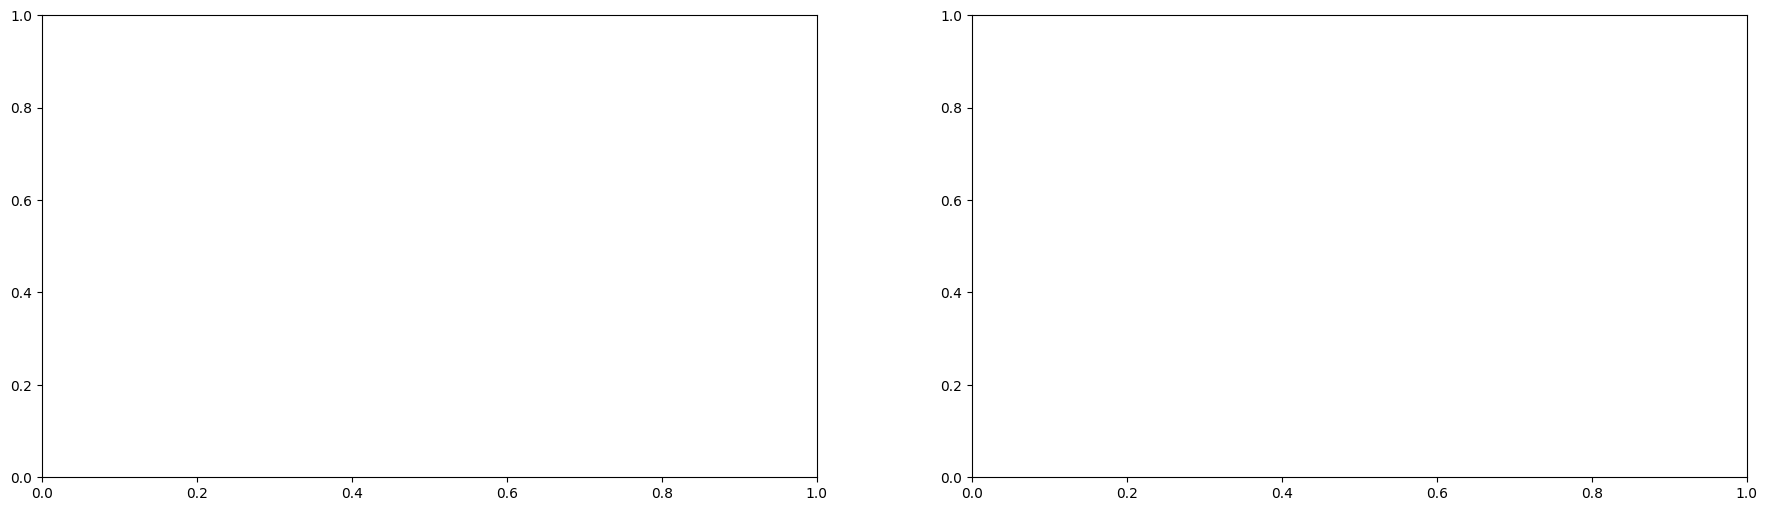

In [47]:
for col in created_cols:
    count_percentage(train, col, "is_promoted")

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_facecolor("#C7D3D4FF")
ax.grid(linewidth = 0.25)

lgb.plot_importance(clf, ax = ax, title = 'Feature importance for Lightgbm Classifier', max_num_features = 30)
plt.show()